In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import datetime

Riverside_CO_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/CO/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/CO/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/CO/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/CO/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/CO/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/CO/2020.csv'])
, ignore_index=True)

In [3]:
import datetime
# the data is collected across multiple sites daily
# TODO: Consider the geographical distribution of the sites and their proximity to each other.
# this function calculates the daily average across all sites - Spatial aggregation
def calculate_daily_average(dataset, date_column, pollutant):
  # Ensure the date column is in datetime format
  dataset[date_column] = pd.to_datetime(dataset[date_column])
  dataset[date_column] = dataset[date_column].dt.date
  daily_avg = dataset.groupby(date_column)[pollutant].mean().reset_index()

  return daily_avg

In [4]:
Riverside_CO_full = calculate_daily_average(Riverside_CO_full, 'Date', 'Daily Max 8-hour CO Concentration')

In [5]:
# Some of the dataset contain missing dates
# this method finds those dates
def find_missing_dates(data, date_column):
  # Ensure the date column is in datetime format
  data[date_column] = pd.to_datetime(data[date_column])
  # Create a full range od dates
  min_date = data[date_column].min()
  max_date = data[date_column].max()
  full_dates = pd.date_range(start=min_date, end=max_date, freq='D')

  # Find missing dates
  missing_dates = full_dates.difference(data[date_column])

  return missing_dates

In [6]:
missing_dates = find_missing_dates(Riverside_CO_full, 'Date')

In [7]:
Riverside_NO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/NO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/NO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/NO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/NO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/NO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/NO2/2020.csv'])
, ignore_index=True)

In [8]:
Riverside_NO2_full = calculate_daily_average(Riverside_NO2_full, 'Date', 'Daily Max 1-hour NO2 Concentration')
missing_dates = find_missing_dates(Riverside_NO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [9]:
Riverside_Ozone_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/Ozone/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/Ozone/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/Ozone/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/Ozone/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/Ozone/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/Ozone/2020.csv'])
, ignore_index=True)

In [10]:
Riverside_Ozone_full = calculate_daily_average(Riverside_Ozone_full, 'Date', 'Daily Max 8-hour Ozone Concentration')
missing_dates = find_missing_dates(Riverside_Ozone_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)


In [11]:
def process_data(data,  date_column, missing_dates):
  # Convert 'Date' column to datetime if it is not already
  data[date_column] = pd.to_datetime(data[date_column])

  # Set 'Date' as the index
  data.set_index(date_column, inplace=True)

  # Add the missing dates to the DataFrame with NaN values
  data = data.reindex(data.index.union(missing_dates))

  #Reset index to make 'Date' a regular column again
  data.reset_index(inplace=True)

  data.fillna(0, inplace=True)

  return data


In [12]:
Riverside_Ozone_full = process_data(Riverside_Ozone_full, 'Date', missing_dates)

In [13]:
# manually add 2020-12-31
new_entry = {'index': pd.to_datetime('2020-12-31'), 'Daily Max 8-hour Ozone Concentration': 0.0326668}
Riverside_Ozone_full.loc[len(Riverside_Ozone_full)] = new_entry

In [14]:
Riverside_Ozone_full.reset_index(drop=True, inplace=True)

In [15]:
Riverside_PM2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM2.5/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM2.5/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM2.5/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM2.5/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM2.5/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM2.5/2020.csv'])
, ignore_index=True)

In [16]:
Riverside_PM2_full = calculate_daily_average(Riverside_PM2_full, 'Date', 'Daily Mean PM2.5 Concentration')
missing_dates = find_missing_dates(Riverside_PM2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [17]:
Riverside_PM10_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM10/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM10/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM10/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM10/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM10/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/PM10/2020.csv'])
, ignore_index=True)

In [18]:
Riverside_PM10_full = calculate_daily_average(Riverside_PM10_full, 'Date', 'Daily Mean PM10 Concentration')
missing_dates = find_missing_dates(Riverside_PM10_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [19]:
Riverside_SO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/SO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/SO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/SO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/SO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/SO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Riverside/SO2/2020.csv'])
, ignore_index=True)

In [20]:
Riverside_SO2_full = calculate_daily_average(Riverside_SO2_full, 'Date', 'Daily Max 1-hour SO2 Concentration')
missing_dates = find_missing_dates(Riverside_SO2_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-02-14', '2015-02-17', '2015-02-18', '2015-04-07',
               '2015-04-08', '2015-04-09', '2015-04-10', '2015-05-28',
               '2015-06-02', '2015-10-15', '2016-01-06', '2016-03-11',
               '2016-06-10', '2016-12-23', '2017-08-31', '2017-09-01',
               '2018-05-23', '2018-05-24', '2018-09-06', '2018-09-07',
               '2018-11-21', '2018-11-22', '2018-11-23', '2018-11-24',
               '2018-11-25', '2019-05-21', '2019-05-22', '2019-06-12',
               '2019-06-18', '2019-06-19', '2019-08-15', '2020-05-22',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-10-26', '2020-11-17',
               '2020-11-18'],
              dtype='datetime64[ns]', freq=None)


In [21]:
Riverside_SO2_full = process_data(Riverside_SO2_full, 'Date', missing_dates)

In [22]:
Riverside_CO_full.rename(columns = {'index':'Date'}, inplace = True)
Riverside_NO2_full.rename(columns = {'index':'Date'}, inplace = True)
Riverside_Ozone_full.rename(columns = {'index':'Date'}, inplace = True)
Riverside_PM2_full.rename(columns = {'index':'Date'}, inplace = True)
Riverside_PM10_full.rename(columns = {'index':'Date'}, inplace = True)
Riverside_SO2_full.rename(columns = {'index':'Date'}, inplace = True)

In [23]:
from functools import reduce
combine = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [Riverside_CO_full,Riverside_NO2_full,Riverside_Ozone_full,Riverside_PM2_full,Riverside_PM10_full,Riverside_SO2_full])

In [24]:
combine.head()

,Date,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Daily Mean PM10 Concentration,Daily Max 1-hour SO2 Concentration
0,2015-01-01,1.02,23.228571,0.035385,31.800000,47.166667,0.9
1,2015-01-02,0.96,30.028571,0.034833,24.455556,45.500000,1.2
2,2015-01-03,0.88,28.371429,0.035231,28.575000,47.625000,1.0
3,2015-01-04,0.96,28.157143,0.036385,28.377778,34.333333,0.9
4,2015-01-05,0.58,24.085714,0.035846,4.333333,25.833333,0.9


In [25]:
combine.rename(columns = {'Daily Max 8-hour CO Concentration':'CO', 'Daily Max 1-hour NO2 Concentration': 'NO2',
                          'Daily Max 8-hour Ozone Concentration': 'Ozone', 'Daily Mean PM2.5 Concentration': 'PM2.5',
                          'Daily Mean PM10 Concentration': 'PM10', 'Daily Max 1-hour SO2 Concentration': 'SO2' }, inplace = True)

In [26]:
combine

,Date,CO,NO2,Ozone,PM2.5,PM10,SO2
0,2015-01-01,1.02,23.228571,0.035385,31.800000,47.166667,0.9
1,2015-01-02,0.96,30.028571,0.034833,24.455556,45.500000,1.2
2,2015-01-03,0.88,28.371429,0.035231,28.575000,47.625000,1.0
3,2015-01-04,0.96,28.157143,0.036385,28.377778,34.333333,0.9
4,2015-01-05,0.58,24.085714,0.035846,4.333333,25.833333,0.9
...,...,...,...,...,...,...,...
2187,2020-12-27,0.56,18.187500,0.033692,12.127273,23.666667,0.6
2188,2020-12-28,0.22,13.225000,0.038786,3.790909,9.166667,0.3
2189,2020-12-29,0.38,21.128571,0.036846,3.738889,4.937500,0.9
2190,2020-12-30,0.50,26.487500,0.038615,4.875000,15.333333,0.7


In [27]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [28]:
# descriptive statistics of the data
print(combine.describe())

                CO          NO2        Ozone        PM2.5         PM10  \
count  2192.000000  2192.000000  2192.000000  2192.000000  2192.000000   
mean      0.379485    18.794686     0.050598    10.641091    36.781978   
std       0.207747     8.038638     0.012404     5.113206    19.760262   
min       0.000000     1.885714     0.000000     1.042857     2.166667   
25%       0.220000    12.414286     0.040817     7.037179    25.181250   
50%       0.340000    18.314286     0.050519    10.097222    35.800000   
75%       0.500000    24.650000     0.059622    13.373333    44.453125   
max       1.480000    45.433333     0.087538    45.187500   309.714286   

               SO2  
count  2192.000000  
mean      0.622673  
std       0.397277  
min       0.000000  
25%       0.300000  
50%       0.600000  
75%       0.900000  
max       5.600000  


In [29]:
# show intensity of each pollutant over time
fig = go.Figure()

for pollutant in ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']:
  fig.add_trace(go.Scatter(x=combine['Date'], y=combine[pollutant], mode='lines',
                           name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Riverside',
                  xaxis_title='Date', yaxis_title='Concentration (ug/m3)')

fig.show()

In [30]:
#Calculate Air Quality Index
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
  for low, high, aqi in aqi_breakpoints:
    if low <= concentration <= high:
      return aqi
  return None

def calculate_overall_aqi(row):
  aqi_values = []
  pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
  for pollutant in pollutants:
    aqi = calculate_aqi(pollutant, row[pollutant])
    if aqi is not None:
      aqi_values.append(aqi)
  return max(aqi_values)


# Calculate AQI for each row
combine['AQI'] = combine.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
  for low, high, category in aqi_categories:
    if low <= aqi_value <= high:
      return category
  return None

In [31]:
#Categorize AQI
combine['AQI Category'] = combine['AQI'].apply(categorize_aqi)
print(combine.head())

        Date    CO        NO2     Ozone      PM2.5       PM10  SO2  AQI  \
0 2015-01-01  1.02  23.228571  0.035385  31.800000  47.166667  0.9  150   
1 2015-01-02  0.96  30.028571  0.034833  24.455556  45.500000  1.2  150   
2 2015-01-03  0.88  28.371429  0.035231  28.575000  47.625000  1.0  150   
3 2015-01-04  0.96  28.157143  0.036385  28.377778  34.333333  0.9  100   
4 2015-01-05  0.58  24.085714  0.035846   4.333333  25.833333  0.9  100   

                     AQI Category  
0  Unhealthy for Sensitive Groups  
1  Unhealthy for Sensitive Groups  
2  Unhealthy for Sensitive Groups  
3                        Moderate  
4                        Moderate  


In [32]:
asthma_data = pd.read_csv('gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/asthma-hospitalization-rates-by-county.csv', encoding="ISO-8859-1")

asthma_data['NUMBER OF HOSPITALIZATIONS'] = asthma_data['NUMBER OF HOSPITALIZATIONS'].str.replace(',', '').astype(float)

print(asthma_data.head())

       COUNTY  YEAR            STRATA STRATA NAME AGE GROUP  \
0  California  2015  Total population    All ages  All ages   
1     Alameda  2015  Total population    All ages  All ages   
2      Alpine  2015  Total population    All ages  All ages   
3      Amador  2015  Total population    All ages  All ages   
4       Butte  2015  Total population    All ages  All ages   

   NUMBER OF HOSPITALIZATIONS  AGE-ADJUSTED HOSPITALIZATION RATE COMMENT  
0                     27262.0                                7.0     NaN  
1                      1435.0                                9.3     NaN  
2                         0.0                                0.0     NaN  
3                        28.0                                7.5     NaN  
4                       143.0                                6.7     NaN  


In [33]:
combine['COUNTY'] = 'Riverside'

In [34]:
combine['Date'] = pd.to_datetime(combine['Date'])
combine_yearly = combine.groupby(['COUNTY',combine['Date'].dt.year]).mean().reset_index()
combine_yearly.rename(columns = {'Date':'YEAR'}, inplace = True)
merged_data = pd.merge(asthma_data, combine_yearly, how='inner', left_on=['COUNTY', 'YEAR'], right_on=['COUNTY', 'YEAR'])
# Perform correlation analysis
correlation_matrix = merged_data[['NUMBER OF HOSPITALIZATIONS', 'CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI']].corr()

<ipython-input-34-28fbee1b0bae>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [35]:
merged_data.head(5)

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE,COMMENT,CO,NO2,Ozone,PM2.5,PM10,SO2,AQI
0,Riverside,2015,Total population,All ages,All ages,1311.0,5.6,NaN,0.369301,19.111999,0.049717,11.747689,38.059349,0.573973,130.821918
1,Riverside,2015,Child vs. adult,017 years,017 years,437.0,7.3,NaN,0.369301,19.111999,0.049717,11.747689,38.059349,0.573973,130.821918
2,Riverside,2015,Child vs. adult,18+ years,18+ years,874.0,4.9,NaN,0.369301,19.111999,0.049717,11.747689,38.059349,0.573973,130.821918
3,Riverside,2015,Age groups,04 years,04 years,175.0,10.9,NaN,0.369301,19.111999,0.049717,11.747689,38.059349,0.573973,130.821918
4,Riverside,2015,Age groups,517 years,517 years,262.0,6.0,NaN,0.369301,19.111999,0.049717,11.747689,38.059349,0.573973,130.821918


In [36]:
print(correlation_matrix)

                            NUMBER OF HOSPITALIZATIONS        CO       NO2  \
NUMBER OF HOSPITALIZATIONS                    1.000000 -0.259725  0.048839   
CO                                           -0.259725  1.000000  0.156745   
NO2                                           0.048839  0.156745  1.000000   
Ozone                                        -0.173063  0.124438 -0.722034   
PM2.5                                         0.145546 -0.341672 -0.626776   
SO2                                          -0.097498  0.174956 -0.168722   
AQI                                           0.032824 -0.012568 -0.493766   

                               Ozone     PM2.5       SO2       AQI  
NUMBER OF HOSPITALIZATIONS -0.173063  0.145546 -0.097498  0.032824  
CO                          0.124438 -0.341672  0.174956 -0.012568  
NO2                        -0.722034 -0.626776 -0.168722 -0.493766  
Ozone                       1.000000  0.203098  0.135243 -0.009140  
PM2.5                       0.

In [ ]:
# AQI over time
fig = px.bar(combine, x="Date", y="AQI",
             title="AQI of Riverside from 2015 - 2020")
fig.update_xaxes(title='Date')
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# AQI Category distribution
fig = px.histogram(combine, x="Date",
                   color="AQI Category",
                   title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Distribution of Pollutants in the air quality of Los Angeles
pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = combine[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Riverside",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = combine[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [37]:
# Correlation Between Pollutants and Number of Hospitalization
parameters = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI', 'NUMBER OF HOSPITALIZATIONS']
correlation_matrix = merged_data[parameters].corr()
fig = px.imshow(correlation_matrix, x=parameters, y=parameters, title="Correlation Between Pollutants and No. of Hospitalization")
fig.show()

In [ ]:
combine['Day_of_Week'] = combine['Date'].dt.day_name()
average_aqi_by_day = combine.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y="AQI",
              title="Average AQI by Day Trends in Riverside")
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
combine['Year'] = combine['Date'].dt.year
average_aqi_by_year = combine.groupby('Year')['AQI'].mean()

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_year, x=average_aqi_by_year.index, y="AQI",
              title="Average AQI by Year Trends in Riverside")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import calendar
combine['Month'] = combine['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
average_aqi_by_month = combine.groupby('Month')['AQI'].mean()
# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_month, x=average_aqi_by_month.index, y="AQI",
              title="Average AQI by Month Trends in Riverside")
fig.update_xaxes(title="Months")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Convert 'Date' to datetime and set it as the index
combine['Date'] = pd.to_datetime(combine['Date'])
combine.set_index('Date', inplace=True)

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
combine['AQI_scaled'] = scaler.fit_transform(combine['AQI'].values.reshape(-1,1))

In [ ]:
# Define sequence length and number of future time steps to predict
sequence_length = 30
#num_future_steps = 3 # Adjust according to needs

# function to create sequences for LSTM
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
 #Create sequences with multiple future time steps
X, y = create_sequences(combine['AQI_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
#X_train = X_train.reshape((X_train.shape[0], sequence_length, len(target_variable)))
#X_test = X_test.reshape((X_test.shape[0], sequence_length, len(target_variable )))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model.compile(optimizer='adam', loss='mse')

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 4s 33ms/step - loss: 0.0245 - val_loss: 0.0068
Epoch 2/50
44/44 [==============================] - 1s 24ms/step - loss: 0.0093 - val_loss: 0.0072
Epoch 3/50
44/44 [==============================] - 1s 23ms/step - loss: 0.0092 - val_loss: 0.0058
Epoch 4/50
44/44 [==============================] - 1s 27ms/step - loss: 0.0091 - val_loss: 0.0062
Epoch 5/50
44/44 [==============================] - 1s 16ms/step - loss: 0.0089 - val_loss: 0.0055
Epoch 6/50
44/44 [==============================] - 1s 16ms/step - loss: 0.0088 - val_loss: 0.0055
Epoch 7/50
44/44 [==============================] - 1s 18ms/step - loss: 0.0087 - val_loss: 0.0054
Epoch 8/50
44/44 [==============================] - 1s 16ms/step - loss: 0.0087 - val_loss: 0.0058
Epoch 9/50
44/44 [==============================] - 1s 16ms/step - loss: 0.0086 - val_loss: 0.0053
Epoch 10/50
44/44 [==============================] - 1s 16ms/step - loss: 0.0086 - val_loss: 0.0063
Epoch 11/

In [ ]:
# make predictions
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 1s 10ms/step


In [ ]:
# evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(combine['AQI'][train_size+sequence_length:], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 768.8346785962549


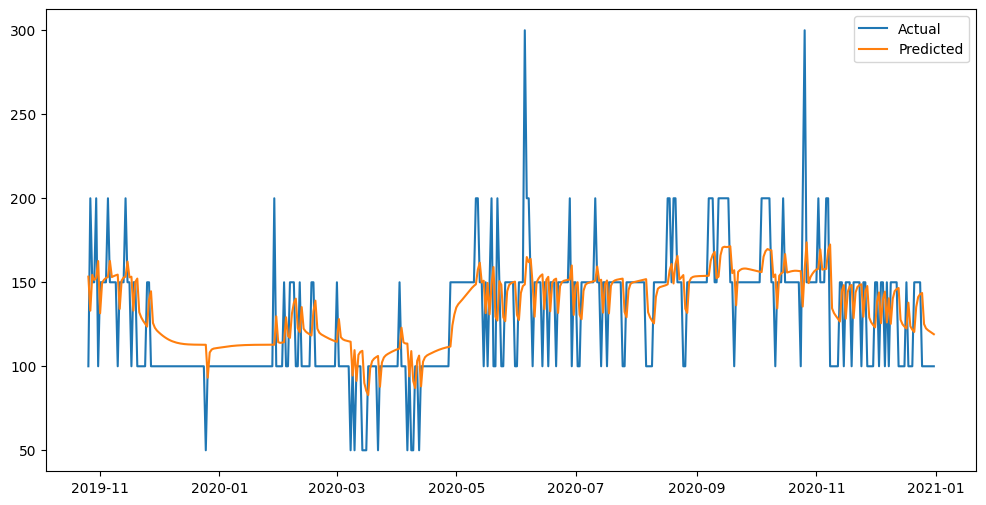

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['AQI'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictions, label='Predicted')
plt.legend()

In [ ]:
# Pollutant CO
combine['CO_scaled'] = scaler.fit_transform(combine['CO'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_CO, y_CO = create_sequences(combine['CO_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_CO_train, X_CO_test = X_CO[:train_size], X_CO[train_size:]
y_CO_train, y_CO_test = y_CO[:train_size], y_CO[train_size:]

In [ ]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model2.compile(optimizer='adam', loss='mse')

In [ ]:
X_CO_train = X_CO_train.reshape((X_CO_train.shape[0], X_CO_train.shape[1], 1))
# Train the model
model2.fit(X_CO_train, y_CO_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 6s 42ms/step - loss: 0.0169 - val_loss: 0.0088
Epoch 2/20
44/44 [==============================] - 1s 34ms/step - loss: 0.0110 - val_loss: 0.0082
Epoch 3/20
44/44 [==============================] - 1s 34ms/step - loss: 0.0109 - val_loss: 0.0083
Epoch 4/20
44/44 [==============================] - 2s 35ms/step - loss: 0.0106 - val_loss: 0.0081
Epoch 5/20
44/44 [==============================] - 2s 48ms/step - loss: 0.0105 - val_loss: 0.0080
Epoch 6/20
44/44 [==============================] - 2s 39ms/step - loss: 0.0105 - val_loss: 0.0080
Epoch 7/20
44/44 [==============================] - 2s 41ms/step - loss: 0.0103 - val_loss: 0.0078
Epoch 8/20
44/44 [==============================] - 2s 44ms/step - loss: 0.0103 - val_loss: 0.0078
Epoch 9/20
44/44 [==============================] - 2s 36ms/step - loss: 0.0102 - val_loss: 0.0077
Epoch 10/20
44/44 [==============================] - 1s 30ms/step - loss: 0.0101 - val_loss: 0.0078
Epoch 11/

In [ ]:
# make predictions
X_CO_test = X_CO_test.reshape((X_CO_test.shape[0], X_CO_test.shape[1], 1))
predictionsCO = model2.predict(X_CO_test)
predictionsCO = scaler.inverse_transform(predictionsCO)

14/14 [==============================] - 1s 9ms/step


In [ ]:
# evaluate the performance of the model
mseCO = mean_squared_error(combine['CO'][train_size+sequence_length:], predictionsCO)
print(f'Mean Squared Error: {mseCO}')

Mean Squared Error: 0.02150058180257454


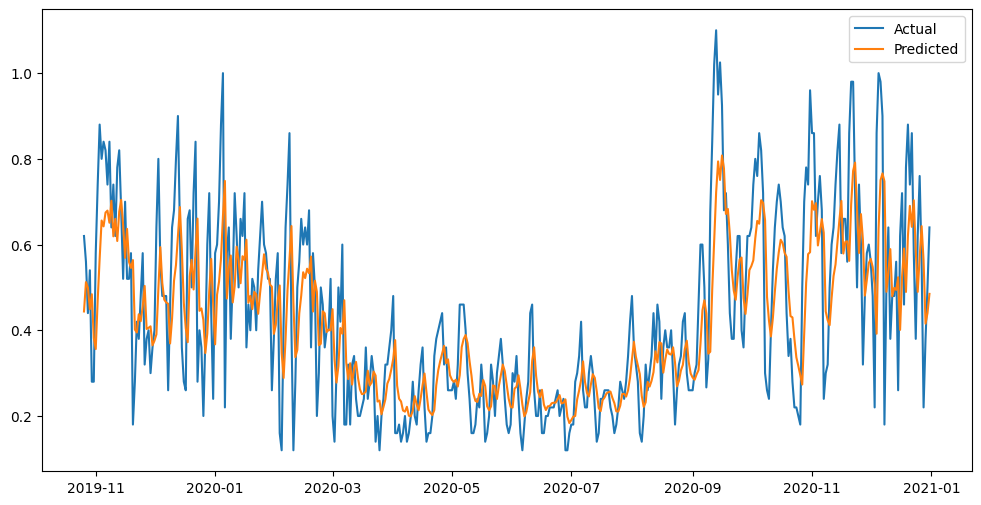

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['CO'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsCO, label='Predicted')
plt.legend()

In [ ]:
model2.save('Riverside-CO.keras')

In [ ]:
model.save('Riverside-AQI.keras')

In [ ]:
# Pollutant PM2.5
combine['PM2.5_scaled'] = scaler.fit_transform(combine['PM2.5'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_PM, y_PM = create_sequences(combine['PM2.5_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_PM_train, X_PM_test = X_PM[:train_size], X_PM[train_size:]
y_PM_train, y_PM_test = y_PM[:train_size], y_PM[train_size:]

In [ ]:
# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model3.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model3.compile(optimizer='adam', loss='mse')

In [ ]:
X_PM_train = X_PM_train.reshape((X_PM_train.shape[0], X_PM_train.shape[1], 1))
# Train the model
model3.fit(X_PM_train, y_PM_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 5s 22ms/step - loss: 0.0283 - val_loss: 0.0063
Epoch 2/20
44/44 [==============================] - 1s 24ms/step - loss: 0.0111 - val_loss: 0.0068
Epoch 3/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0105 - val_loss: 0.0075
Epoch 4/20
44/44 [==============================] - 1s 26ms/step - loss: 0.0102 - val_loss: 0.0061
Epoch 5/20
44/44 [==============================] - 1s 25ms/step - loss: 0.0099 - val_loss: 0.0064
Epoch 6/20
44/44 [==============================] - 1s 25ms/step - loss: 0.0096 - val_loss: 0.0067
Epoch 7/20
44/44 [==============================] - 1s 25ms/step - loss: 0.0093 - val_loss: 0.0062
Epoch 8/20
44/44 [==============================] - 1s 25ms/step - loss: 0.0090 - val_loss: 0.0051
Epoch 9/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0087 - val_loss: 0.0051
Epoch 10/20
44/44 [==============================] - 1s 16ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 11/

In [ ]:
# make predictions
X_PM_test = X_PM_test.reshape((X_PM_test.shape[0], X_PM_test.shape[1], 1))
predictionsPM = model3.predict(X_PM_test)
predictionsPM = scaler.inverse_transform(predictionsPM)

14/14 [==============================] - 2s 17ms/step


In [ ]:
# evaluate the performance of the model
msePM = mean_squared_error(combine['PM2.5'][train_size+sequence_length:], predictionsPM)
print(f'Mean Squared Error: {msePM}')

Mean Squared Error: 12.454794244447726


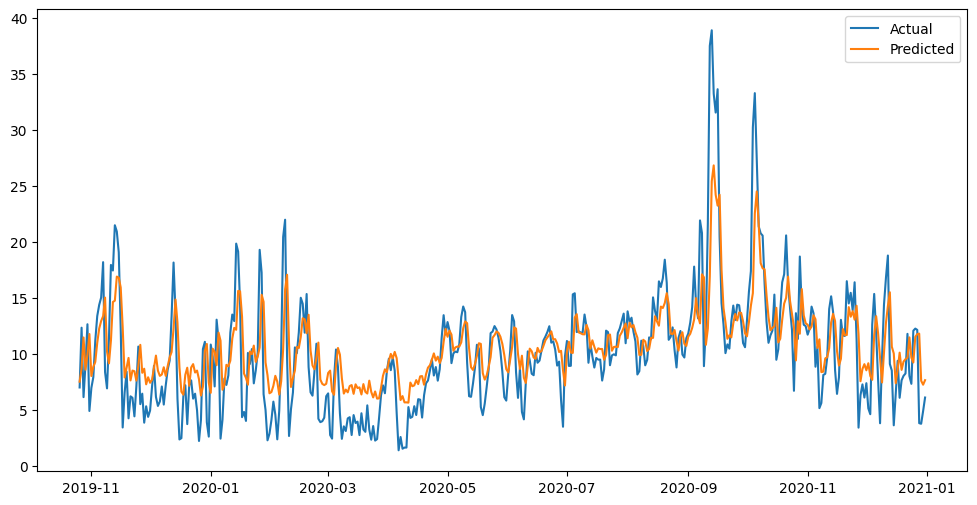

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['PM2.5'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsPM, label='Predicted')
plt.legend()

In [ ]:
model3.save('Riverside-PM2.5.keras')